<a href="https://colab.research.google.com/github/Renan-Domingues/IntroductionToPytorch/blob/main/IntrodutionPytorch_01_IntrodutionToPytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Tensors

In [ ]:
import torch

Just a few of the ways to create tensors

In [ ]:
z = torch.zeros(5, 3)
print(z)
print(z.dtype)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.float32


float32 it's the default PyTorch Tensors
float 32 means  that the zeros are 32-bit floating

If I wanted integers instead, I can override the default

In [ ]:
i = torch.ones((5, 3), dtype=torch.int16)
print(i)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)


In [ ]:
# using manual seed

torch.manual_seed(42)
r1 = torch.rand(2, 2)
print('A random tensor:')
print(r1)
r2 = torch.rand(2, 2)
print('\nA different random tensor')
print(r2)
torch.manual_seed(42)
r3 = torch.rand(2, 2)
print('\nShould match r1:')
print(r3)

A random tensor:
tensor([[0.8823, 0.9150],
        [0.3829, 0.9593]])

A different random tensor
tensor([[0.3904, 0.6009],
        [0.2566, 0.7936]])

Should match r1:
tensor([[0.8823, 0.9150],
        [0.3829, 0.9593]])


Operations with scalars are distributed over the tensors:

In [ ]:
ones = torch.ones(2, 3)
print(ones)

twos = torch.ones(2, 3) * 2
print(twos)

threes = ones + twos
print(threes)
print(threes.shape)

'''
r1 = torch.rand(3, 2)
r2 = torch.rand(2, 3)

r3 = r1 + r2

print(r3) -> esse código daria erro, pois não se pode somar formatos diferentes

'''

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[2., 2., 2.],
        [2., 2., 2.]])
tensor([[3., 3., 3.],
        [3., 3., 3.]])
torch.Size([2, 3])


'\nr1 = torch.rand(3, 2)\nr2 = torch.rand(2, 3)\n\nr3 = r1 + r2\n\nprint(r3) -> esse código daria erro, pois não se pode somar formatos diferentes\n\n'

In [ ]:
# Sample of mathematical operations available:

r = (torch.rand(2, 2) - 0.5) *2 # Values between -1 and 1
print('A random matrix, r:')
print(r)

# Common mathematical operations are supported:
print('\nAbsolute value of r:')
print(torch.abs(r))

# ...as are trigonometric function
print('\n Inverse sine of r:')
print(torch.asin(r))

# ...and linear algebra operations like determinant and singular value decomposition
print('\nDeterminant of r:')
print(torch.det(r))
print('\nSingular value decomposition of r:')
print(torch.svd(r))

# ... and statistical and aggregate operations:
print('\nAverage and standard deviation of r:')
print(torch.std_mean(r))
print('\nMaximum value of r')
print(torch.max(r))

A random matrix, r:
tensor([[-0.2191,  0.2018],
        [-0.4869,  0.5873]])

Absolute value of r:
tensor([[0.2191, 0.2018],
        [0.4869, 0.5873]])

 Inverse sine of r:
tensor([[-0.2209,  0.2032],
        [-0.5085,  0.6277]])

Determinant of r:
tensor(-0.0304)

Singular value decomposition of r:
torch.return_types.svd(
U=tensor([[-0.3616, -0.9323],
        [-0.9323,  0.3616]]),
S=tensor([0.8181, 0.0372]),
V=tensor([[ 0.6517,  0.7585],
        [-0.7585,  0.6517]]))

Average and standard deviation of r:
(tensor(0.4722), tensor(0.0208))

Maximum value of r
tensor(0.5873)


# PyTorch Models

In [ ]:
import torch
import torch.nn as nn # for modules
import torch.nn.functional as F # for the activation function

In [ ]:
# expressing a simple neural network in code

class LeNet(nn.Module):
  def __init__(self):
    super(LeNet, self).__init__()
    # 1 input image channel (black and white), 6 output channels, 5x5 square convolutional
    # kernel
    self.conv1 = nn.Conv2d(1, 6, 5)
    self.conv2 = nn.Conv2d(6, 16, 5)
    # an affine operation: y = Wx + b
    self.fc1 = nn.Linear(16 * 5 * 5, 120) # 5x5 from image dimension
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    # Max pooling over a (2, 2) window
    x =  F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
    # if the size is a square you can only specify a single number
    x = F.max_pool2d(F.relu(self.conv2(x)), 2)
    x = x.view(-1, self.num_flat_features(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

  def num_flat_features(self, x):
    size = x.size()[1:] # all dimensions except the batch dimension
    num_features = 1
    for s in size:
      num_features *= s
    return num_features

The structure of a typical Pytorch  model:

- It inherits from ``torch.nn.Module``.
- A Model will have an __init__() function, where it intantiantes its layers, and load any data artifacts it might need
- A model will have a forwad() function. This is where the actual computation happens: An input is passed through the network layers and various functions to generate a output
- Other than that, you can build out your model class like any other Python class, adding whatever properties and methods you need to support your model's computation.

In [ ]:
# Let's instantiate this object and run a sample input though it:

net = LeNet()
print(net) # what does the object tell us about itself?

input = torch.rand(1, 1, 32, 32) # stand-in for a 32x32 black and white image
print('\nImage batch shape:')
print(input.shape)

output = net(input) # we don't call forward() directly
print('\nRaw output:')
print(output)
print(output.shape)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

Image batch shape:
torch.Size([1, 1, 32, 32])

Raw output:
tensor([[-0.0074,  0.0062,  0.1226,  0.0073, -0.0885,  0.0682,  0.0014, -0.0808,
         -0.0962,  0.0505]], grad_fn=<AddmmBackward0>)
torch.Size([1, 10])


We instantiete the LeNet class, and we print the net object. A subclass of torch.nn.Module will report the layers it has created and their shapes and parameters.

We create a dummy input representing a 32x32 image with 1 color channel. Normally, you wold load an image tile and convert it to a tensor of this shape.

The extra dimension to our tensor is the batch dimension. PyTorch models assume they are working on batches of data. For example, a batch with 16 images wold have the shape (16, 1, 32, 32)

We ask the model for an inference by calling it like a function: net(input). The output of this call represents the model's confidence that the input represents a particular digit. (Since this instance of the model hasn't learned anything yet, we shouldn't expect to see any signal in the output.) Looking at the shape of output, we can see that it also has a batch dimension, the size of which should always match the input batch dimension. If we had passed in an input batch of 16 instances, output would have a shape of (16, 10).

# Dataset and DataLoaders

In [ ]:
%matplotlib inline

import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.4914, 0.4822, 0.4464), (0.2470, 0.2435, 0.2616))]
)


- transforms.ToTensor() converts images loaded by pillow into PyTorch tensors
- transform.Normalize() adjusts the values of the tensor so that their average is zero and their standard deviation is 1.0. Most activation function have their strongest gradients around x=0, so centering our data there can speed learning.

Next, we’ll create an instance of the CIFAR10 dataset. This is a set of 32x32 color image tiles representing 10 classes of objects: 6 of animals (bird, cat, deer, dog, frog, horse) and 4 of vehicles (airplane, automobile, ship, truck):

In [ ]:
trainset = torchvision.datasets.CIFAR10(root='./data',
                                        train=True,
                                        download=True,
                                        transform=transform)

Files already downloaded and verified


In [ ]:
# passing the dataset to the dataLoader

trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=4,
                                          shuffle=True,
                                          num_workers=2)

The dataloder organizes the input tensors served by the dataset into batches with the parameters you specify.

In the example above, we've asked a DataLoader to give us batches of 4 images from trainset, randomizing their order (shuffle=True), and we told it to spin up two workers to load data from disk.

horse  cat bird  cat


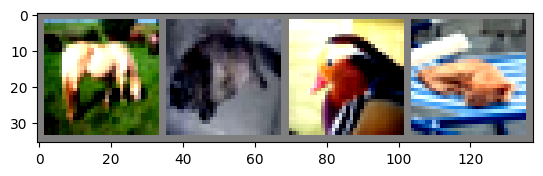

In [ ]:
# It's good practice to visualize the batches your DataLoader serves:

import matplotlib.pyplot as plt
import numpy as np

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
  img = img / 2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

#  show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(''.join('%5s' % classes[labels[j]] for j in range(4)))

# Training my PyTorch Model

Putting all the pieces together and training a model

In [ ]:
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

The training and test datasets I downloaded in the train cell

In [ ]:
# This is the model we'll train

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16 * 5 * 5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

net = Net()

adding a loss function and a optimizer

In [ ]:
criterion = nn.CrossEntropyLoss() # Loss function
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


the ``net.parameters()`` is a collection of all the learning weights in the model (which is what the optimizer adjust)

it's time to assemble the training loop

In [ ]:
for epoch in range(2):  # loop over the dataset multiple times

  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    # get the inputs
    inputs, labels = data

    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    # print statistics
    running_loss += loss.item()
    if i % 2000  == 1999:   # print every 2000 mini-batches
      print('[%d, %5d] loss:%.3f' %
            (epoch + 1, i + 1, running_loss / 2000))
      running_loss = 0.0

print('Finished Training')

[1,  2000] loss:2.065
[1,  4000] loss:1.748
[1,  6000] loss:1.606
[1,  8000] loss:1.529
[1, 10000] loss:1.472
[1, 12000] loss:1.430
[2,  2000] loss:1.353
[2,  4000] loss:1.341
[2,  6000] loss:1.294
[2,  8000] loss:1.283
[2, 10000] loss:1.285
[2, 12000] loss:1.251
Finished Training


Here, we are doing only 2 training epochs (line 1) - that is, two passes over the training dataset. Each pass has an inner loop that iterates over the training data (line 4), serving batches of transformed input images and their correct labels.

As a final step, we shoud check if the model is doing general learning and not simply "memorizing" the dataset (this hapens when there is not enough examples)

to do this, we ask the model to make predictions on data it hasn't trained on

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))



Accuracy of the network on the 10000 test images: 59 %


59% is better than the 10% expected
so the model is learning!!!